# Machine Learning - Random Forest (Floresta Aleatória)

#### Importação das bibliotecas necessárias

In [92]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados.

In [93]:
df_edu = pd.read_csv('xAPI-Edu-Data.csv')

In [96]:
df_edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Verificando as distribuições de classes.

In [97]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

#### Verificando os registros nulos

In [99]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#### Codificando os atributos numéricos.

In [101]:
Features = df_edu
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    label = LabelEncoder()
    Features[col] = label.fit_transform(Features[col])

In [102]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


#### Dividindo os dados em treino e teste

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',axis=1),df_edu['Class'],test_size=0.3,random_state=0)

#### Verificando a forma dos dados

In [114]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

In [116]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [117]:
random_clf = RandomForestClassifier()

#### Parâmetros do  objeto RandomForestClassifier
* <span style="color:red">n_estimators: número de árvores que serão criadas na floresta.</span>
* <span style="color:red"> bootstrap: se será considerado o bootstrap dataset durante a criação das árvores.</span>
* <span style="color:red"> max_features: número total de features que as árvores serão criadas.</span>
* criterion: medida de qualidade da divisão.
* splitter: estratégia utilizada para dividir o nó de decisão.
* max_depth: profundidade máxima da árvore.
* min_samples_split: número de amostras mínimas para considerar um nó para divisão.
* min_samples_leaf: número de amostras mínimas no nível folha.

#### Treinando o modelo Random Forest

In [118]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predizendo as classes a partir do modelo treinado utilizando o conjunto de teste

In [119]:
resultado = random_clf.predict(X_test)

In [120]:
resultado

array([2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [121]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

             precision    recall  f1-score   support

          0       0.66      0.64      0.65        39
          1       0.80      0.94      0.86        34
          2       0.76      0.70      0.73        71

avg / total       0.74      0.74      0.74       144



#### Verificando as features mais importantes para o modelo treinado

In [122]:
random_clf.feature_importances_

array([0.02784434, 0.04756115, 0.027154  , 0.0211159 , 0.03781271,
       0.02349588, 0.04420793, 0.00824017, 0.04241965, 0.12269797,
       0.16543874, 0.13086617, 0.08907242, 0.04494746, 0.02295346,
       0.14417206])

In [124]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [125]:
feature_imp

VisITedResources            0.165439
StudentAbsenceDays          0.144172
AnnouncementsView           0.130866
raisedhands                 0.122698
Discussion                  0.089072
NationalITy                 0.047561
ParentAnsweringSurvey       0.044947
Topic                       0.044208
Relation                    0.042420
GradeID                     0.037813
gender                      0.027844
PlaceofBirth                0.027154
SectionID                   0.023496
ParentschoolSatisfaction    0.022953
StageID                     0.021116
Semester                    0.008240
dtype: float64

#### Features mais importantes de forma gráfica

In [126]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

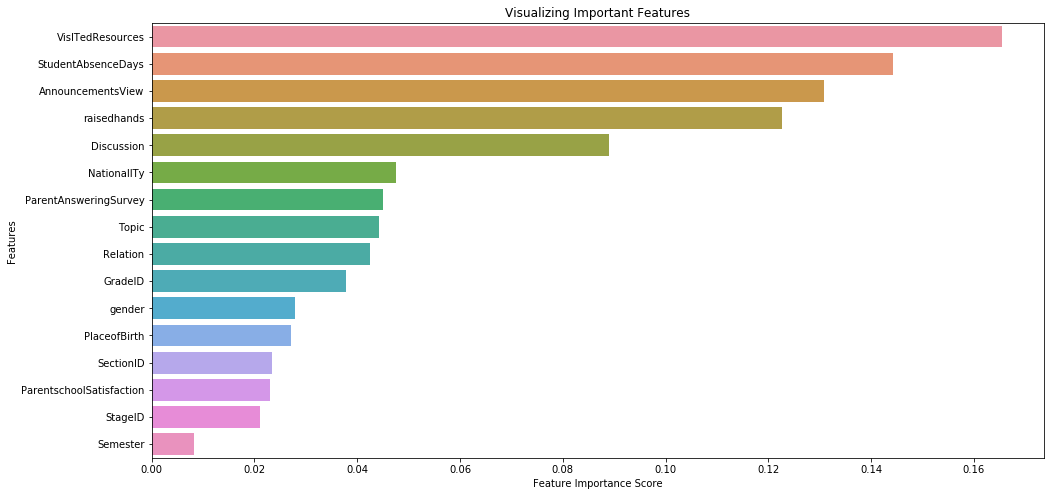

In [127]:
visualiza_features_importantes(feature_imp)

#### Selecionando apenas as features com importancia acima de um determinado score.

In [128]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.16543873795060154
StudentAbsenceDays:	0.1441720602085234
AnnouncementsView:	0.13086616966787562
raisedhands:	0.12269797277178016
Discussion:	0.08907242283969755
NationalITy:	0.047561151025259485
ParentAnsweringSurvey:	0.0449474567179747
Topic:	0.04420793025855516
Relation:	0.042419645804640055
GradeID:	0.03781271374442373


#### Separando os dados em treino e teste utilizando apenas as features selecionadas

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

#### Verificando a nova forma dos dados

In [130]:
X_train.shape,X_test.shape

((336, 10), (144, 10))

In [131]:
y_train.shape,y_test.shape

((336,), (144,))

#### Instânciando o objeto classificador

In [132]:
random_clf = RandomForestClassifier(random_state=0)

#### Treinando novamente o modelo Random Forest

In [133]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Executando o algoritmo de arvore de decisão com o conjunto de teste

In [134]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

#### Métricas de Validação

In [135]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

             precision    recall  f1-score   support

          0       0.74      0.82      0.78        39
          1       0.85      0.97      0.90        34
          2       0.87      0.76      0.81        71

avg / total       0.83      0.83      0.83       144



## Explorando as árvores da Floresta gerada

In [136]:
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_)))
print("Árvores floresta gerada:")
for tree in random_clf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))


Número de árvores da floresta: 10
Árvores floresta gerada:

Numero de nós: 131
Profundidade da árvore: 12
Features importantes: [0.3130636  0.18447141 0.06116519 0.06027714 0.06001637 0.03912715
 0.08559454 0.09546845 0.06224878 0.03856738]

Objeto: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=209652396, splitter='best')

Numero de nós: 131
Profundidade da árvore: 9
Features importantes: [0.29675579 0.04247732 0.11854316 0.23198744 0.06565641 0.04628071
 0.10337816 0.01991798 0.04406178 0.03094125]

Objeto: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         

#### Selecionando uma árvore da floresta

In [137]:
tree0 = random_clf.estimators_[0]

#### Visualizando de forma gráfica

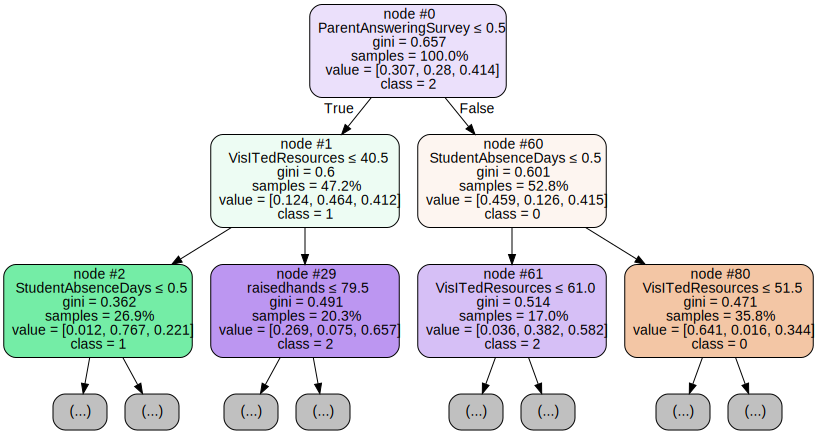

In [138]:
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

#### Selecionando outra árvore da floresta

In [139]:
tree1 = random_clf.estimators_[1]

#### Visualizando de forma gráfica

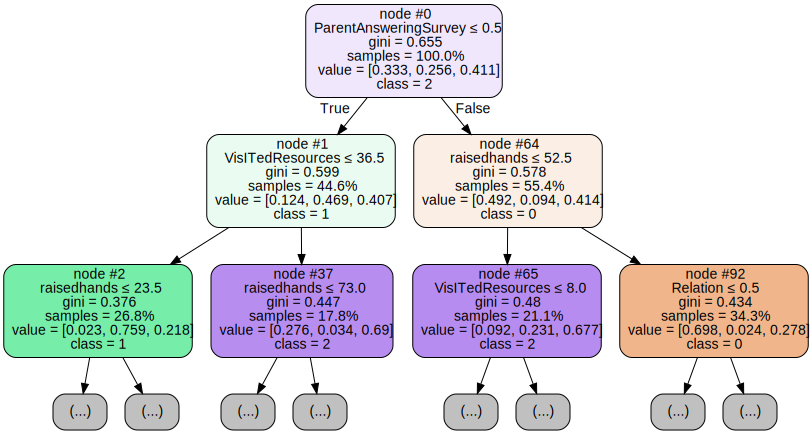

In [140]:
dot_data = export_graphviz(
         tree1,
         max_depth=2,
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph